In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
def calculate_stability(sequence):
    # Dictionary to map nucleotide pairs to their respective stability values
    stability_map = {
        'AA': -1,
        'AT': -0.88,
        'TA': -0.58,
        'AG': -1.3,
        'GA': -1.3,
        'TT': -1,
        'AC': -1.45,
        'CA': -1.45,
        'TG': -1.44,
        'GT': -1.44,
        'TC': -1.28,
        'CT': -1.28,
        'CC': -1.84,
        'CG': -2.24,
        'GC': -2.27,
        'GG': -1.84,
    }
    
    size = len(sequence)
    list_stability = []
    
    for pos in range(size-1):
        nucleotide_pair = sequence.upper()[pos:pos+2]
        stability = stability_map.get(nucleotide_pair, None)
        
        if stability is not None:
            list_stability.append(stability)
    
    return list_stability

def create_dataframe(file_path):
    # Read the contents of the file
    with open(file_path) as f:
        sequence = f.read()

    # Calculate the stability values for the sequence
    list_stability = calculate_stability(sequence)

    # Calculate the number of rows and columns needed
    num_rows = (len(list_stability) - 1) // 99 + 1
    num_cols = min(len(list_stability), 99)

    # Create a 2D numpy array with NaN values to represent the DataFrame
    data_array = np.full((num_rows, num_cols), np.nan)

    # Fill the data_array with the stability values
    for i, val in enumerate(list_stability):
        row = i // 99
        col = i % 99
        data_array[row, col] = val

    # Create the DataFrame with 99 columns
    df_sequence = pd.DataFrame(data_array, columns=range(1, num_cols + 1))

    return df_sequence


file_path = r"D:\Sequences 80-20\Sequences_80-20_sequences Chlamydia pneumoniae.txt"

# Create the dataframe containing the stability values for the given sequence
df_stability = create_dataframe(file_path)

# generate a list of column names
new_columns = list(range(-80, 19))
df_stability.columns=new_columns
df_stability.reset_index(drop=True, inplace=True)

# Display the dataframe
df_stability

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-2.27,-2.24,-1.84,-1.84,-1.30,-1.30,-1.30,-0.88,-0.58,-1.00,...,-0.88,-1.00,-1.00,-1.00,-1.44,-1.30,-0.88,-1.00,-1.00,-0.58
1,-1.84,-1.45,-0.88,-0.58,-1.45,-1.84,-1.28,-0.58,-1.30,-2.27,...,-0.88,-1.44,-1.44,-1.44,-1.44,-1.00,-1.00,-1.44,-1.30,-0.88
2,-1.28,-0.58,-0.88,-1.00,-1.00,-1.00,-1.00,-1.00,-0.58,-1.00,...,-0.58,-0.88,-1.00,-1.28,-1.84,-1.28,-1.28,-1.28,-1.00,-0.58
3,-1.30,-1.44,-1.44,-1.44,-1.00,-1.28,-1.28,-0.58,-0.88,-1.00,...,-1.30,-1.30,-1.84,-1.84,-1.30,-1.00,-1.00,-1.00,-1.00,-1.00
4,-1.00,-0.58,-1.00,-1.30,-1.30,-1.30,-1.30,-1.00,-1.00,-1.30,...,-1.00,-1.00,-1.00,-0.88,-1.28,-1.45,-1.00,-1.00,-1.30,-1.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-1.84,-1.28,-1.44,-1.44,-0.58,-0.88,-1.00,-1.44,-1.30,-1.00,...,-1.44,-1.44,-1.44,-1.00,-1.00,-1.44,-1.84,-1.84,-2.27,-1.45
400,-0.88,-1.44,-1.30,-1.00,-0.88,-1.28,-1.84,-1.28,-0.58,-1.30,...,-1.44,-1.44,-0.58,-1.45,-2.24,-1.84,-1.44,-1.28,-2.24,-1.84
401,-1.28,-1.00,-1.00,-1.00,-1.00,-0.58,-0.88,-1.00,-1.00,-1.00,...,-2.24,-1.84,-1.84,-1.84,-1.30,-1.30,-2.27,-1.84,-1.45,-1.00
402,-1.00,-1.45,-1.45,-1.00,-1.30,-1.84,-1.30,-1.00,-1.00,-1.45,...,-1.00,-0.88,-1.28,-1.28,-1.28,-2.24,-1.30,-1.45,-1.45,-1.00


In [6]:
for_line= pd.DataFrame(df_stability.mean())
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

C:\Users\Subhojit\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


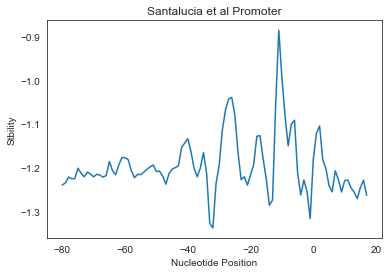

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stbility", title='Santalucia et al Promoter')

# show the plot
plt.show()